In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import jax
jax.config.update('jax_platform_name', 'cpu')

In [3]:
from entot.data.data import create_gaussians, create_gaussian_split
from entot.plotting.plots import plot_1D
from entot.models.models import NoiseOutsourcingModel
from entot.models.utils import MixtureNormalSampler
import matplotlib.pyplot as plt
import numpy as np
import jax.numpy as jnp

In [4]:
sampler_source = MixtureNormalSampler([0], 1, 100, 0.5)
sampler_target = MixtureNormalSampler([-1.0,1.0], 1, 100, 0.1)

In [5]:
source = sampler_source(jax.random.PRNGKey(0))

In [6]:
source.shape

(100,)

In [7]:
target = sampler_target(jax.random.PRNGKey(0))

In [8]:
T_xz = jnp.expand_dims(jnp.transpose(jnp.expand_dims(target, 0)), axis=-1) + 0.01 * jax.random.normal(jax.random.PRNGKey(0), shape=(100,1,10))

# Dataset 1

In [12]:
source, target = create_gaussians(100, 100, var_source=0.2, var_target=0.2)

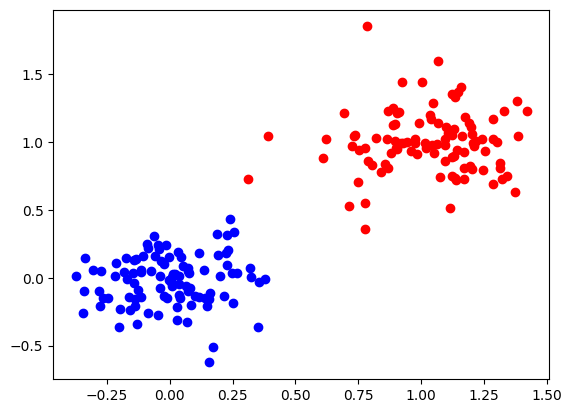

In [13]:
plt.scatter(source[:,0], source[:,1], color="blue")
plt.scatter(target[:, 0], target[:, 1], color="red")

In [56]:
sm = NoiseOutsourcingModel(1.0, 64, 64, iterations=100, inner_iterations=10, input_dim=2, noise_dim=2)


In [57]:
sm(source, target)

100%|██████████| 100/100 [03:31<00:00,  2.11s/it]


In [58]:
sm.metrics

{'t_obj': [Array(0.3113432, dtype=float32),
  Array(1.5404296, dtype=float32),
  Array(13.25672, dtype=float32),
  Array(37.298313, dtype=float32),
  Array(132.51463, dtype=float32),
  Array(221.02042, dtype=float32),
  Array(170.92532, dtype=float32),
  Array(170.69225, dtype=float32),
  Array(114.03636, dtype=float32),
  Array(84.24959, dtype=float32),
  Array(81.8645, dtype=float32),
  Array(59.62711, dtype=float32),
  Array(121.16301, dtype=float32),
  Array(77.4729, dtype=float32),
  Array(69.66081, dtype=float32),
  Array(39.629658, dtype=float32),
  Array(14.805152, dtype=float32),
  Array(0.50847554, dtype=float32),
  Array(0.4091268, dtype=float32),
  Array(-0.04836619, dtype=float32),
  Array(-0.0079539, dtype=float32),
  Array(0.12658432, dtype=float32),
  Array(-0.37110922, dtype=float32),
  Array(-0.34740916, dtype=float32),
  Array(0.228637, dtype=float32),
  Array(0.26472518, dtype=float32),
  Array(0.9036113, dtype=float32),
  Array(1.0616499, dtype=float32),
  Array(1.

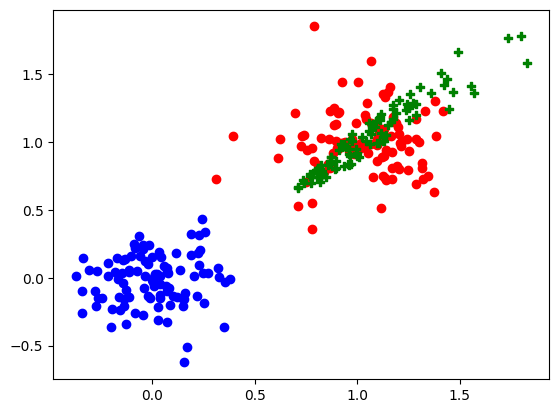

In [59]:
transported = sm.transport(source)
plt.scatter(source[:,0], source[:,1], color="blue")
plt.scatter(target[:, 0], target[:, 1], color="red")
plt.scatter(transported[:, 0], transported[:, 1], color="green", marker="P")

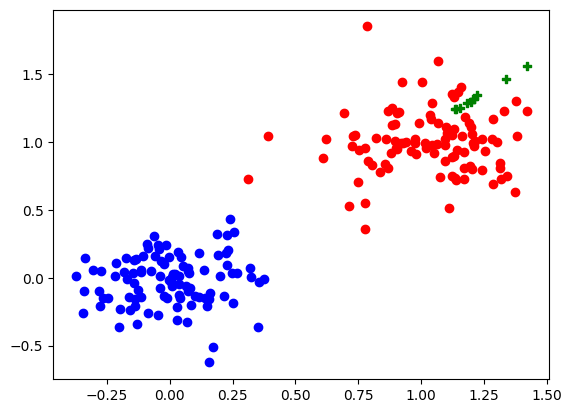

In [63]:
sampled = sm.sample(source[20,None])
plt.scatter(source[:,0], source[:,1], color="blue")
plt.scatter(target[:, 0], target[:, 1], color="red")
plt.scatter(sampled[:, 0], sampled[:, 1], color="green", marker="P")

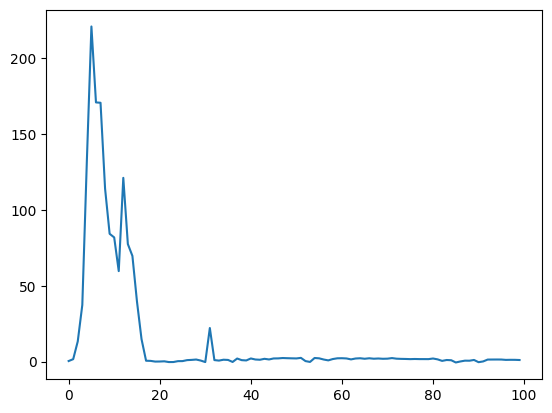

In [61]:
plt.plot(np.arange(len(sm.metrics["t_obj"])), sm.metrics["t_obj"])

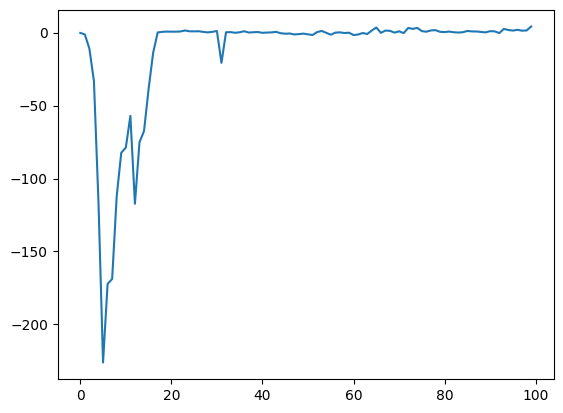

In [62]:
plt.plot(np.arange(len(sm.metrics["phi_obj"])), sm.metrics["phi_obj"])

In [29]:
a = jnp.array([[1,2, 3], [3,4, 5]])

In [30]:
a.shape

(2, 3)

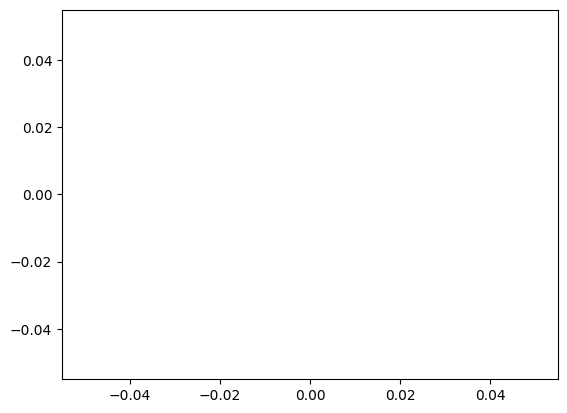

In [35]:
plt.plot(np.arange(len(sm.metrics["phi_obj"])), sm.metrics["phi_obj"])